# KNN and Nueral Network

Download Census Income data set from UCI repository - link is https://archive.ics.uci.edu/ml/datasets/census+income
Use training data do develop a model aimed to determine whether a person makes over 50K a year.
Solve this problem using k-nearest neighbors’ method with k=3 and k=9 and report F1 score on test data.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("adult.test",names=['Age','Workclass','Fnlwgt','Education','Education-num','Martial-Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','Hours-per-week','Native-Country','Salary'],na_values=' ?')
df=df.dropna()
df

,Age,Workclass,Fnlwgt,Education,Education-num,Martial-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-Country,Salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [3]:
#Noisy Data
df.drop(['Age','Fnlwgt','Education-num', 'Capital-gain','Capital-loss','Hours-per-week','Native-Country'], axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Workclass       15060 non-null  float64
 1   Education       15060 non-null  float64
 2   Martial-Status  15060 non-null  float64
 3   Occupation      15060 non-null  float64
 4   Relationship    15060 non-null  float64
 5   Race            15060 non-null  float64
 6   Sex             15060 non-null  float64
 7   Salary          15060 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.0 MB


In [22]:
df.describe()

,Workclass,Education,Martial-Status,Occupation,Relationship,Race,Sex,Salary
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,0.117154,0.271058,0.205998,0.442343,0.317703,0.253868,0.326228,0.245684
std,0.227956,0.225776,0.228499,0.236870,0.234764,0.155117,0.468848,0.430506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.066667,0.000000,0.307692,0.200000,0.250000,0.000000,0.000000
50%,0.000000,0.200000,0.166667,0.461538,0.200000,0.250000,0.000000,0.000000
75%,0.166667,0.466667,0.166667,0.615385,0.400000,0.250000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Engineering

In [4]:
df['Workclass']=pd.factorize(df['Workclass'])[0]
df['Education']=pd.factorize(df['Education'])[0]
df['Martial-Status']=pd.factorize(df['Martial-Status'])[0]
df['Occupation']=pd.factorize(df['Occupation'])[0]
df['Relationship']=pd.factorize(df['Relationship'])[0]
df['Race']=pd.factorize(df['Race'])[0]
df['Sex']=pd.factorize(df['Sex'])[0]
df['Salary']=pd.factorize(df['Salary'])[0]

In [5]:
df['Workclass'] = df['Workclass'].replace(' ?',np.nan)
df['Occupation'] = df['Occupation'].replace(' ?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)
df.shape
df

,Workclass,Education,Martial-Status,Occupation,Relationship,Race,Sex,Salary
0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,0,0
2,1,2,1,2,1,1,0,1
3,0,3,1,0,1,0,0,1
5,0,4,0,3,2,1,0,0
...,...,...,...,...,...,...,...,...
16275,0,7,0,4,0,1,0,0
16276,0,7,4,4,2,1,1,0
16278,0,7,1,4,1,1,0,0
16279,0,7,4,6,0,4,0,0


## Machine Learning

In [6]:
X =df.iloc[:,0:7]
y =df.iloc[:,7]

X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
#feature Scaling
sc_X = StandardScaler()

In [7]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [8]:
classifier.fit(X_train,y_train)
y_pred =  classifier.predict(X_test)

In [9]:
cm= confusion_matrix(y_test,y_pred)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.8007968127490039
F1 Score: 0.5702005730659025


In [10]:
classifier = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
classifier.fit(X_train,y_train)
y_pred =  classifier.predict(X_test)

In [11]:
cm= confusion_matrix(y_test,y_pred)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.8134130146082338
F1 Score: 0.5945165945165944


## Solve this problem using a using feed-forward neural network and report ROC on test data.

In [12]:
target_column = ['Salary'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Workclass,15060.0,0.117154,0.227956,0.0,0.000000,0.000000,0.166667,1.0
Education,15060.0,0.271058,0.225776,0.0,0.066667,0.200000,0.466667,1.0
Martial-Status,15060.0,0.205998,0.228499,0.0,0.000000,0.166667,0.166667,1.0
Occupation,15060.0,0.442343,0.236870,0.0,0.307692,0.461538,0.615385,1.0
Relationship,15060.0,0.317703,0.234764,0.0,0.200000,0.200000,0.400000,1.0
Race,15060.0,0.253868,0.155117,0.0,0.250000,0.250000,0.250000,1.0
Sex,15060.0,0.326228,0.468848,0.0,0.000000,0.000000,1.000000,1.0
Salary,15060.0,0.245684,0.430506,0.0,0.000000,0.000000,0.000000,1.0


In [13]:
X = df[predictors].values
y = df[target_column].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(10542, 7)
(4518, 7)


In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train.ravel())

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[7195  764]
 [1307 1276]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7959
           1       0.63      0.49      0.55      2583

    accuracy                           0.80     10542
   macro avg       0.74      0.70      0.71     10542
weighted avg       0.79      0.80      0.80     10542

[[3053  348]
 [ 565  552]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3401
           1       0.61      0.49      0.55      1117

    accuracy                           0.80      4518
   macro avg       0.73      0.70      0.71      4518
weighted avg       0.79      0.80      0.79      4518



In [17]:
import sklearn.metrics as metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_test, pos_label=1)

In [18]:
fpr

array([0.        , 0.10232285, 1.        ])

In [19]:
tpr

array([0.        , 0.49418084, 1.        ])

In [20]:
thresholds

array([2, 1, 0], dtype=int64)

ROC on test data is >> 0.6959289976590696


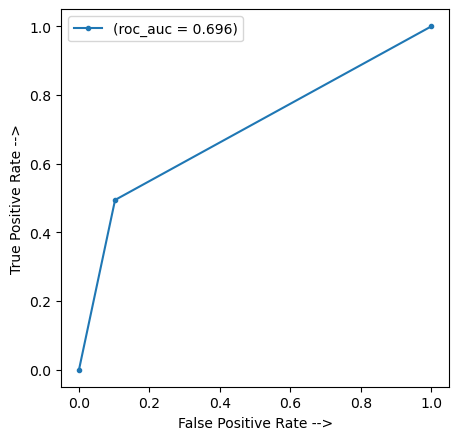

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, threshold = roc_curve(y_test, predict_test)
roc_auc = auc(fpr,tpr)
print("ROC on test data is >>",roc_auc)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='(roc_auc = %0.3f)' % roc_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()